# Evaluate Ablation Studies


In [4]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
from os.path import join

sb.set()
sb.set_style("whitegrid")
sb.set_context("paper")
xticks = list(range(1, 11, 1))

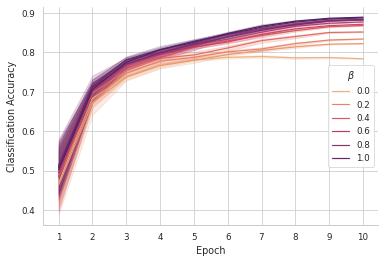

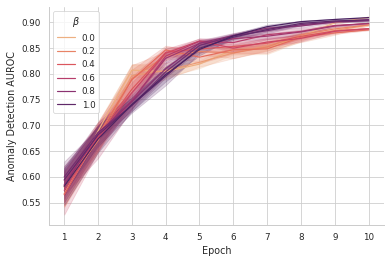

In [22]:


root = "/home/ki/projects/work/mchad/logs/multiruns/ablation/01/20/22-09:18:24"
# root = "/home/ki/projects/work/mchad/logs/multiruns/ablation/12/04/21-14:49:51/"

from matplotlib.ticker import FuncFormatter

dfs = []

for i in range(0, 12):
    # /home/ki/projects/work/mchad/logs/multiruns/ablation/01/20/22-09:18:24
    path = f"{root}/vary_ce/{i}/"
    cfg = OmegaConf.load(join(path, "config.yaml"))
    ce = cfg["model"]["weight_ce"]
    df = pd.read_csv(join(path, "csv/version_0/metrics.csv"))

    tmp = df[["epoch", "step", "Distance/OSR/AUROC/val", "Accuracy/val"]].dropna()
    tmp["$\\beta$"] = ce
    tmp["epoch"] += 1
    dfs.append(tmp)

df = pd.concat(dfs).reset_index()

g = sb.lineplot(data=df, x="epoch", y="Accuracy/val", hue="$\\beta$", palette="flare")
plt.xlabel("Epoch")
plt.ylabel("Classification Accuracy")
sb.despine()
g.set(xticks=xticks)
plt.legend(loc="center right", title="$\\beta$")
plt.savefig("out/acc-beta.pgf", dpi=300)
plt.show()


g = sb.lineplot(
    data=df, x="epoch", y="Distance/OSR/AUROC/val", hue="$\\beta$", palette="flare"
)
plt.xlabel("Epoch")
plt.ylabel("Anomaly Detection AUROC")
sb.despine()
g.set(xticks=xticks)
plt.savefig("out/auroc-beta.pgf", dpi=300)
plt.show()

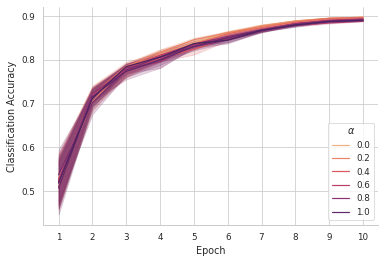

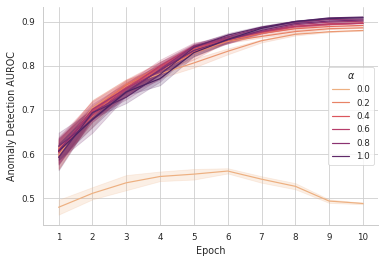

In [23]:
dfs = []

for i in range(0, 12):
    path = f"{root}/vary_center/{i}/"
    cfg = OmegaConf.load(join(path, "config.yaml"))
    ce = cfg["model"]["weight_center"]
    df = pd.read_csv(join(path, "csv/version_0/metrics.csv"))

    tmp = df[["step", "epoch", "Distance/OSR/AUROC/val", "Accuracy/val"]].dropna()
    tmp["$\\alpha$"] = ce
    tmp["epoch"] += 1
    dfs.append(tmp)

df = pd.concat(dfs).reset_index()

g = sb.lineplot(data=df, x="epoch", y="Accuracy/val", hue="$\\alpha$", palette="flare")
plt.xlabel("Epoch")
plt.ylabel("Classification Accuracy")
sb.despine()
g.set(xticks=xticks)
plt.savefig("out/acc-alpha.pgf", dpi=300)
plt.show()

g = sb.lineplot(
    data=df, x="epoch", y="Distance/OSR/AUROC/val", hue="$\\alpha$", palette="flare"
)
plt.xlabel("Epoch")
plt.ylabel("Anomaly Detection AUROC")
sb.despine()
g.set(xticks=xticks)
plt.savefig("out/auroc-alpha.pgf", dpi=300)
plt.show()

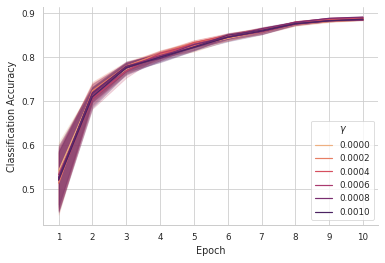

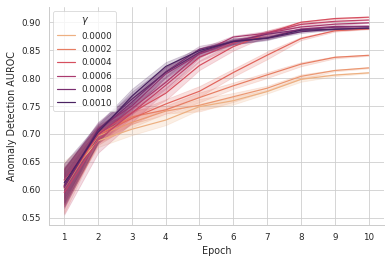

In [6]:
dfs = []

for i in range(0, 11):
    path = f"/home/ki/projects/work/mchad/logs/multiruns/ablation/01/24/22-12:51:52/vary_oe/{i}/"
    cfg = OmegaConf.load(join(path, "config.yaml"))
    ce = cfg["model"]["weight_oe"]
    df = pd.read_csv(join(path, "csv/version_0/metrics.csv"))

    tmp = df[["step", "epoch", "Distance/OSR/AUROC/val", "Accuracy/val"]].dropna()
    tmp["$\\gamma$"] = ce
    tmp["epoch"] += 1
    dfs.append(tmp)

df = pd.concat(dfs).reset_index()

g = sb.lineplot(data=df, x="epoch", y="Accuracy/val", hue="$\gamma$", palette="flare")
plt.xlabel("Epoch")
plt.ylabel("Classification Accuracy")
sb.despine()
g.set(xticks=xticks)
# plt.savefig("out/acc-gamma.pgf", dpi=300)
plt.show()

g = sb.lineplot(
    data=df, x="epoch", y="Distance/OSR/AUROC/val", hue="$\gamma$", palette="flare"
)
plt.xlabel("Epoch")
plt.ylabel("Anomaly Detection AUROC")
g.set(xticks=xticks)
sb.despine()
# plt.savefig("out/auroc-gamma.pgf", dpi=300)
plt.show()

In [25]:
df

,index,step,epoch,Distance/OSR/AUROC/val,Accuracy/val,$\gamma$
0,2,77,1.0,0.538046,0.3348,0.0
1,7,155,1.0,0.531085,0.4122,0.0
2,10,233,1.0,0.572056,0.4006,0.0
3,15,311,1.0,0.592177,0.4600,0.0
4,18,389,1.0,0.585173,0.5354,0.0
...,...,...,...,...,...,...
1195,404,7523,10.0,0.816466,0.8381,1.1
1196,409,7601,10.0,0.817656,0.8370,1.1
1197,412,7679,10.0,0.816212,0.8379,1.1
1198,417,7757,10.0,0.817016,0.8378,1.1
